In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for data visualization
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#Replacement of 0 values by NaN in a copy dataset
data_copy = data

data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']] = data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']].replace(0,np.NaN)

## showing the count of Nans
print(data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


##### In this section, we will replace all zeros and missing values such as NaN with the average of the designated columns. I decided to use a specific number of columns to perform the cleaning. These are the columns: ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Pedigree'], as these are the most important data with visible impact that determine whether a patient is diabetic or not.



In [4]:
data_copy['Glucose'].fillna(data_copy['Glucose'].mean(), inplace = True)
data_copy['BloodPressure'].fillna(data_copy['BloodPressure'].mean(), inplace = True)
data_copy['SkinThickness'].fillna(data_copy['SkinThickness'].median(), inplace = True)
data_copy['Insulin'].fillna(data_copy['Insulin'].median(), inplace = True)
data_copy['BMI'].fillna(data_copy['BMI'].median(), inplace = True)
data_copy['DiabetesPedigreeFunction'].fillna(data_copy['DiabetesPedigreeFunction'].median(), inplace = True)

data_copy.head().style.highlight_max(color="lightblue").highlight_min(color="red")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.000000,72.000000,35.000000,125.000000,33.600000,0.627000,50,1
1,1,85.000000,66.000000,29.000000,125.000000,26.600000,0.351000,31,0
2,8,183.000000,64.000000,29.000000,125.000000,23.300000,0.672000,32,1
3,1,89.000000,66.000000,23.000000,94.000000,28.100000,0.167000,21,0
4,0,137.000000,40.000000,35.000000,168.000000,43.100000,2.288000,33,1


0    500
1    268
Name: Outcome, dtype: int64


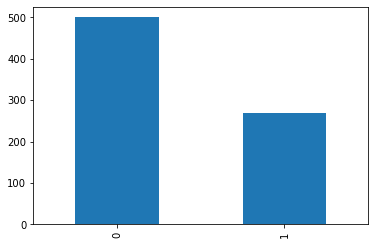

In [5]:
print(data_copy.Outcome.value_counts())
p=data_copy.Outcome.value_counts().plot(kind="bar")



The graph above shows us the number of people with diabetes marked by 1 and we can see that the number of people without diabetes is almost double the number of people with diabetes.

In [6]:
#We will normalize our columns.

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(data_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction','Age'])

In [7]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [8]:
y = data_copy.Outcome

In [9]:
#Division of our dataset in 2: the label which is Y and X which are the independent data.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.75,random_state=42, stratify=y)

<Figure size 864x360 with 0 Axes>

<Figure size 864x360 with 0 Axes>

<Figure size 864x360 with 0 Axes>

<Figure size 864x360 with 0 Axes>

<Figure size 864x360 with 0 Axes>

<Figure size 864x360 with 0 Axes>

<Figure size 864x360 with 0 Axes>

<Figure size 864x360 with 0 Axes>

<Figure size 864x360 with 0 Axes>

<Figure size 864x360 with 0 Axes>

<Figure size 864x360 with 0 Axes>

<Figure size 864x360 with 0 Axes>

<Figure size 864x360 with 0 Axes>

<Figure size 864x360 with 0 Axes>

<Figure size 864x360 with 0 Axes>

<Figure size 864x360 with 0 Axes>

<Figure size 864x360 with 0 Axes>

<Figure size 864x360 with 0 Axes>

<Figure size 864x360 with 0 Axes>

<Figure size 864x360 with 0 Axes>

<Figure size 864x360 with 0 Axes>

<Figure size 864x360 with 0 Axes>

<Figure size 864x360 with 0 Axes>

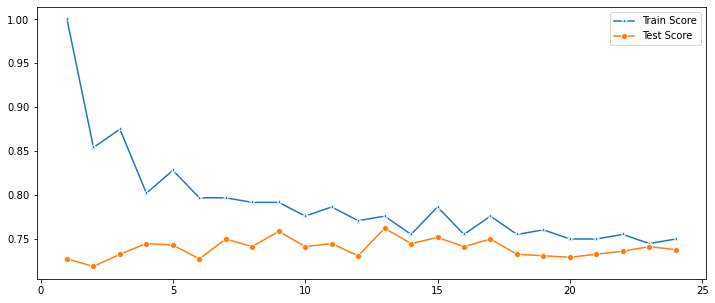

In [10]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,25):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
    
    plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,25),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,25),test_scores,marker='o',label='Test Score')

In [11]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [12]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 76.21527777777779 % and k = [13]


###### The best result is captured at k = 13 hence 13 is used for the final model.


In [14]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(13)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7621527777777778

## Model Performance Analysis
### Confusion Matrix
The confusion matrix is a technique used for summarizing the performance of a classification algorithm i.e. it has binary outputs

In [16]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,336,39,375
1,98,103,201
All,434,142,576
